# Sprint 2 EDA Project 
This project aims to demonstrate competency in uploading files into a dataframe and cleaning the dataframe (finding and removing duplicate values, find and remove missing values)
Once the dataframes are cleaned the program will attempt to answer some questions regarding the uploaded data using graphics. 
Data is from grocery deliver company, Instacart.  There are five seperate files.


In "orders" file each row is one order from the app and columsn for 'order_id'(ID number that uniquely identifies each order), 
'user_id'(ID number that uniquely identifies each customer account)'order_number'(the number of times this customer has placed
an order), 'order_dow' (day of the week that the order placed), 'order_hour_of_day' (hour of the day that the order was 
placed), 'days_since_prior_order'(number of days since this customer placed their previous order). 

In 'products' file each row corresponds to a unique product that customers can buy.  The columns are 'product_id' (ID number
that uniquely identifies each product), 'product_name' (name of the product), 'aisle_id' (ID number that uniquely 
identifies each grocery aisle category), 'department_id' (ID number that uniquely identifies each grocery department 
category).  

 In order_products file each row corresponds to one item placed in an order.  The columns are 'order_id'(ID number that 
uniquely identifies each order), 'product_id'(ID number that uniquely identifies each product), 'add_to_cart_order' (the 
sequential order in which each item was placed in the cart), 'reordered' (0 if the customer has never ordered this product
before, 1 if they have). 

 In aisles file is information regardin gthe aisle in the store.  The columns discuss 'aisle_id' (ID number that uniquely
identifies each grocery aisle category) and 'aisle' (name of the aisle). 

 In departments file contains information regarding the departments in each grocery store.  The columns are 'department_id'
(ID number that uniquely identifies each grocery department category) and 'department' (name of the department). 


In [1]:
import pandas as pd

#import all csv files.  all have seperators as :. made dataframe name same as file name.  inserted column names. no decimals needed. 

In [2]:
order_products = pd.read_csv('/datasets/order_products.csv',sep =';', low_memory=False)

In [3]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [4]:
aisles = pd.read_csv('/datasets/aisles.csv',sep=';')

In [5]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
departments = pd.read_csv('/datasets/departments.csv',sep=';')

In [7]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [8]:
products = pd.read_csv('/datasets/products.csv',sep=';')

In [9]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [10]:
orders = pd.read_csv('/datasets/instacart_orders.csv',sep=';', low_memory=False)

In [11]:
print(orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [12]:
# Checked for duplicated orders
#chose sum because if the returned result is zero indication that no duplicates exist 
print(orders.duplicated().sum())
orders.info()

15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [13]:
# Checked for all orders placed Wednesday at 2:00 AM
#create variable to search dataFrame if 2 am time and Wed. date selected. 
wed_2am_orders = orders[
    (orders['order_dow'] == 2) & 
    (orders['order_hour_of_day'] == 2)
]

print(wed_2am_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
1295     1474941   115569             5          2                  2   
2391     1640269   173965            15          2                  2   
2550     1223696    55276            11          2                  2   
5965      579194    85018            14          2                  2   
17680    2004230   203121             4          2                  2   
...          ...      ...           ...        ...                ...   
457660   1562381    19378             5          2                  2   
460316   1986084   117453            81          2                  2   
462676   1362113    19654            20          2                  2   
472800   1746383    88484            19          2                  2   
472923   1519815   149345             1          2                  2   

        days_since_prior_order  
1295                      28.0  
2391                       2.0  
2550                    

In [14]:
# Removed duplicate orders
#drop_duplicates used to identify the column to target for replicates of order.  
#if order_id is the same it is the same order number being repeated.  Reset the index so that if rows are removed there is no gaps. 
order_no_duplicates=orders.drop_duplicates(subset='order_id').reset_index(drop=True)
print(order_no_duplicates)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478947   3210681     5617             5          1                 14   
478948   3270802   112087             2          3                 13   
478949    885349    82944            16          2                 11   
478950    216274     4391             3          3                  8   
478951   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [15]:
# Double check for duplicate rows
#check for duplicates in newly created variable where they are dropped. checked with .info() to compare from original sount. 
print(order_no_duplicates.duplicated().sum())
order_no_duplicates.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


Appears that almost half of the orders were duplicates

In [16]:
# Double check for duplicate order IDs only
#focus on column "order_id" to search for duplicates. double check with .info()
print(order_no_duplicates.duplicated('order_id').sum())
order_no_duplicates.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


### `products` data frame

In [17]:
# Check for fully duplicate rows
#use duplicated to check and sum to give the count of anything duplicated
print(products.duplicated().sum())
products.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [18]:
# Check for just duplicate product IDs
print(products['product_id'].duplicated().sum())
products.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [19]:
# Check for just duplicate product names (convert names to lowercase to compare better)
#first confirm what df looks like before beginning. 
print(products['product_name'])


0                               Chocolate Sandwich Cookies
1                                         All-Seasons Salt
2                     Robust Golden Unsweetened Oolong Tea
3        Smart Ones Classic Favorites Mini Rigatoni Wit...
4                                Green Chile Anytime Sauce
                               ...                        
49689                        HIGH PERFORMANCE ENERGY DRINK
49690                        ORIGINAL PANCAKE & WAFFLE MIX
49691      ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                               SPRING WATER BODY WASH
49693                              BURRITO- STEAK & CHEESE
Name: product_name, Length: 49694, dtype: object


In [20]:
#reassing lowered case to same name 
products['product_name']=products['product_name'].str.lower()


In [21]:
#confirm command changed case
products

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In [22]:
#remove all rows without data in original dataframe
products = products.dropna(subset=['product_name'])

In [23]:
#sum values that are duplicated. 
products['product_name'].duplicated().sum()

104

In [24]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48436 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     48436 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       48436 non-null  int64 
 3   department_id  48436 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ MB


In [25]:
# Check for duplicate product names that aren't missing
display(products[~products['product_name'].isna()])
products[~products['product_name'].isna()].duplicated().sum()

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


0

### `departments` data frame

In [26]:
#decide to check for duplicates in entire row 
departments.duplicated().sum()
#check for duplicates in each column 
departments['department_id'].duplicated().sum()
departments ['department'].duplicated().sum()

0

In [27]:
#decide to check for any empty cells
display(departments[~departments['department_id'].isna()])
display(departments[~departments['department'].isna()])

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


### `aisles` data frame

In [28]:
#decide to check for duplicates in entire row 
aisles.duplicated().sum()
#check for duplicates in each column 
aisles['aisle_id'].duplicated().sum()
aisles['aisle'].duplicated().sum()

0

In [29]:
#decide to check for any empty cells
display(aisles[~aisles['aisle_id'].isna()])
display(aisles[~aisles['aisle'].isna()])

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


### `order_products` data frame

In [30]:
# Check for fullly duplicate rows
order_products.duplicated().sum()


0

In [31]:
# Double check for any other tricky duplicates
#decided to look for partial duplicates
order_products[['order_id','product_id']].duplicated().sum()

#order_products['order_id','product_id', 'add_to_cart_order', 'reordered'].duplicated().sum()
#thought about look for duplicates with case differences but all four of the columns are numbers so not needed  
# check if any empty frields
#display(order_products[~order_products['product_id'].isna()])
#order_products[~order_products['product_id'].isna().all]
#print(order_products[~order_products['order_id'].isa()].all)
#print(order_products[~order_products['add_to_cart_order'].isa().all])
#print(order_products[~order_products['reordered'].isa().all])
#print(order_products[~order_products[''].isa().all])

0

## Find and remove missing values


### `products` data frame

In [32]:
#find missing values
products.info()
products.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48436 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     48436 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       48436 non-null  int64 
 3   department_id  48436 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ MB


product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [33]:
# Are all of the missing product names associated with aisle ID 100?
#filter on multiple conditions
print(len(products[(products['product_name'].isnull()) & (products['aisle_id'] == 100)])==products['product_name'].isna().sum())


True


In [34]:
# Are all of the missing product names associated with department ID 21?
print(len(products[(products['product_name'].isnull()) & (products['department_id'] == 21)])==products['product_name'].isna().sum())


True


In [35]:
# What is this ailse and department?
print(products[(products['department_id'] == 21) & (products['aisle_id'] == 100)])


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [36]:
# Fill missing product names with 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)
print(products.isna().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### `orders` data frame

In [37]:
#check for missing values 
orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [38]:
# Are there any missing values where it's not a customer's first order?
# only column with missing values is in "days_since_prior_order" so check that column for null when order_number solidified 
print(len(orders[(orders['days_since_prior_order'].isnull()) & (orders['order_number'] == 100)])==orders['days_since_prior_order'].isna().sum())

False


### `order_products` data frame

In [39]:
order_products.isna().sum()


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [40]:
order_products.isnull().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [41]:
# What are the min and max values in this column?
print(order_products.groupby('add_to_cart_order').max())
print(order_products.groupby('add_to_cart_order').min())


                   order_id  product_id  reordered
add_to_cart_order                                 
1.0                 3421079       49693          1
2.0                 3421077       49694          1
3.0                 3421077       49694          1
4.0                 3421077       49694          1
5.0                 3421071       49694          1
...                     ...         ...        ...
60.0                3383594       49680          1
61.0                3383594       49176          1
62.0                3383594       49416          1
63.0                3383594       49215          1
64.0                3383594       49566          1

[64 rows x 3 columns]
                   order_id  product_id  reordered
add_to_cart_order                                 
1.0                       4           1          0
2.0                       4           1          0
3.0                       4           1          0
4.0                       4           1          0
5.0     

In [42]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
#create assigned variable to store the order_id number when value missing in column"add_to_cart_order"
add_to_cart_order=order_products.loc[order_products['add_to_cart_order'].isna(),'order_id'].tolist()
print(add_to_cart_order)

[2449164, 1968313, 2926893, 1717990, 1959075, 844733, 61355, 936852, 264710, 1717990, 1564093, 129627, 264710, 293169, 2849370, 1386261, 3308010, 903110, 2136777, 3347453, 1888628, 165801, 2449164, 2094761, 3347453, 1038146, 2136777, 2997021, 844733, 844733, 2136777, 813364, 165801, 2256933, 171934, 264710, 2449164, 2409109, 3347453, 813364, 2926893, 936852, 1730767, 1169835, 733526, 844733, 293169, 61355, 903110, 1968313, 733526, 2136777, 2926893, 404157, 1386261, 171934, 3125735, 747668, 3308010, 1169835, 1800005, 1961723, 936852, 2849370, 3308010, 61355, 871281, 1717990, 813364, 388234, 61355, 3125735, 1959075, 61355, 3125735, 1648217, 171934, 3125735, 61355, 1477139, 1959075, 1717990, 1717990, 61355, 1717990, 171934, 1038146, 3308010, 3347453, 102236, 936852, 171934, 1730767, 2926893, 1021563, 1832957, 1959075, 2256933, 1968313, 2721963, 293169, 102236, 3125735, 1959075, 264710, 678116, 1220886, 1386261, 171934, 1959075, 61355, 3308010, 61355, 102236, 388234, 171934, 3308010, 19617

In [43]:
# Do all orders with missing values have more than 64 products?
order_products[order_products['add_to_cart_order'].isna()].groupby('order_id')['product_id'].count().reset_index()['product_id'].sort_values


<bound method Series.sort_values of 0      1
1     63
2     31
3      5
4      6
      ..
65     6
66    22
67    51
68     7
69     5
Name: product_id, Length: 70, dtype: int64>

In [44]:
order_products['add_to_cart_order'].isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0          False
1          False
2          False
3          False
4          False
           ...  
4545002    False
4545003    False
4545004    False
4545005    False
4545006    False
Name: add_to_cart_order, Length: 4545007, dtype: bool>

In [45]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order']=order_products['add_to_cart_order'].where(order_products['add_to_cart_order'] == 'add_to_cart_order', '999')
order_products['add_to_cart_order']=order_products['add_to_cart_order'].astype(int)
print(order_products['add_to_cart_order'].head())


0    999
1    999
2    999
3    999
4    999
Name: add_to_cart_order, dtype: int64


In [46]:
len(order_products['product_id'].unique())


45573

###  Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [47]:
#import plotting library to enable visualizations
from matplotlib import pyplot as plt

In [48]:
#filter for multiple factors to ensure column of ordering day has values between o and 23
orders_sensible=(orders[(orders['order_hour_of_day']>=0) & (orders['order_hour_of_day']<=23)])
print(orders_sensible)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [49]:
ordering_hour_graph=orders.groupby('order_hour_of_day').size()
print(ordering_hour_graph)

order_hour_of_day
0      3180
1      1763
2      1004
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
dtype: int64


<AxesSubplot:title={'center':'Verify Ordering Hour is Sensible'}, xlabel='Ordering Hour', ylabel='frequency of Occurance'>

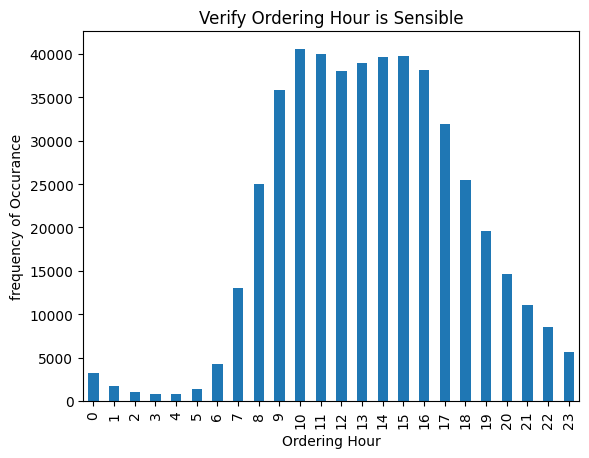

In [50]:
ordering_hour_graph.plot(kind='bar', title='Verify Ordering Hour is Sensible', xlabel='Ordering Hour', ylabel= "frequency of Occurance")

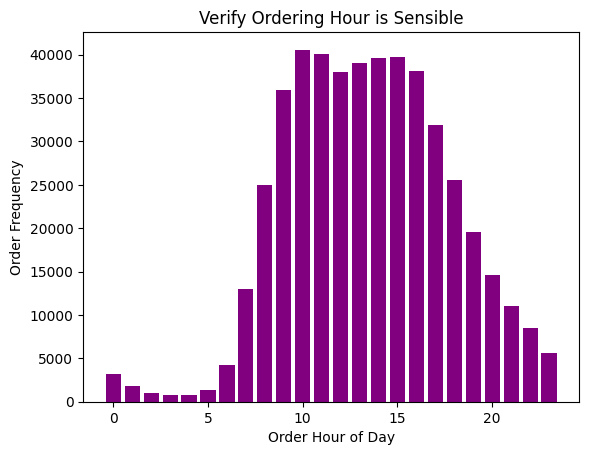

In [51]:
#create table to visualize data
#orders['order_hour_of_day'].plot(title='Verify Ordering Hour is Sensible',xlabel='Order Hour of Day', ylabel='Order Frequency', style='0',xlim=[0,25])

plt.bar(ordering_hour_graph.index, ordering_hour_graph.values, color='purple')

# Add labels and title
plt.xlabel('Order Hour of Day')
plt.ylabel('Order Frequency')
plt.title('Verify Ordering Hour is Sensible')

# Show the plot
plt.show()

In [52]:
#filter for multiple factors to ensure column of ordering day has values between o and 6
hour_sensible=(orders[(orders['order_dow']>=0) & (orders['order_dow']<=6)])
print(hour_sensible)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

order_dow
0    84090
1    82185
2    65833
3    60912
4    59810
5    63488
6    62649
dtype: int64


<AxesSubplot:title={'center':'Verify Ordering Day is Sensible'}, xlabel='Ordering Day', ylabel='Frequency of Occurance'>

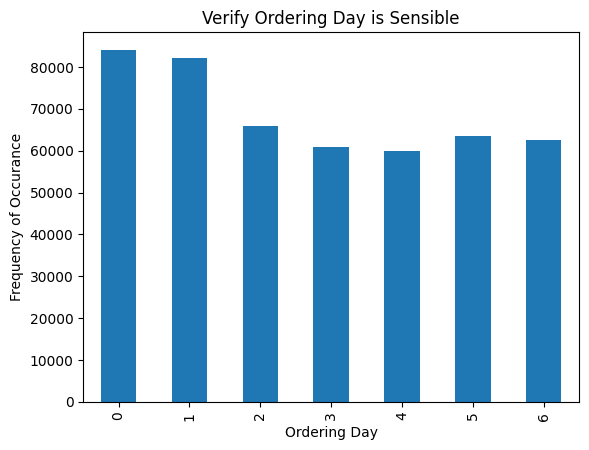

In [53]:
#verify via graph 
#create variable of grouped information from column 
hour_sensible_grouped=orders.groupby('order_dow').size()
print(hour_sensible_grouped)
hour_sensible_grouped.plot(kind='bar', title='Verify Ordering Day is Sensible', xlabel='Ordering Day', ylabel= "Frequency of Occurance")

### What time of day do people shop for groceries?

In [54]:
grocery_order_hour=orders['order_hour_of_day'].value_counts()
print(grocery_order_hour)
#perform a value count for the hour of day when orders occur.  Most frequent appears to be at 10 am since numbers on a 24 hour cycle. 

10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
9     35896
17    31930
18    25510
8     25024
19    19547
20    14624
7     13043
21    11019
22     8512
23     5611
6      4215
0      3180
1      1763
5      1371
2      1004
3       770
4       765
Name: order_hour_of_day, dtype: int64


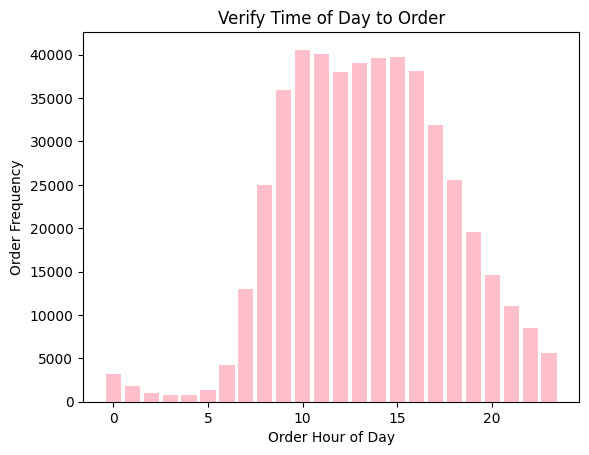

In [55]:
plt.bar(grocery_order_hour.index, grocery_order_hour.values, color='pink')

# Add labels and title
plt.xlabel('Order Hour of Day')
plt.ylabel('Order Frequency')
plt.title('Verify Time of Day to Order')

# Show the plot
plt.show()

It seems the most common time to order is between 10 am and 4 pm.  Most specific hour surge is at 10 am.  

### What day of the week do people shop for groceries?

In [56]:
#use value_counts to sort column for day people shop into number of people on each day.  People shop everyday but the most orders are created on Monday. 
weekday_shopping=orders['order_dow'].value_counts()
print(weekday_shopping)

0    84090
1    82185
2    65833
5    63488
6    62649
3    60912
4    59810
Name: order_dow, dtype: int64


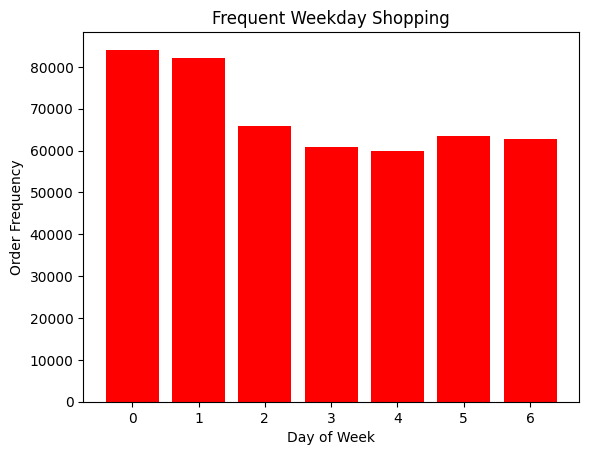

In [57]:
plt.bar(weekday_shopping.index, weekday_shopping.values, color='red')

# Add labels and title
plt.xlabel('Day of Week')
plt.ylabel('Order Frequency')
plt.title('Frequent Weekday Shopping')

# Show the plot
plt.show()

It appears the most common days for ordering is the beginning of the week.  This would be on Sunday and Monday. 

### How long do people wait until placing another order?

In [58]:
length_wait=orders['days_since_prior_order'].value_counts()

Text(0.5, 1.0, 'Time Users Wait Before Reorder')

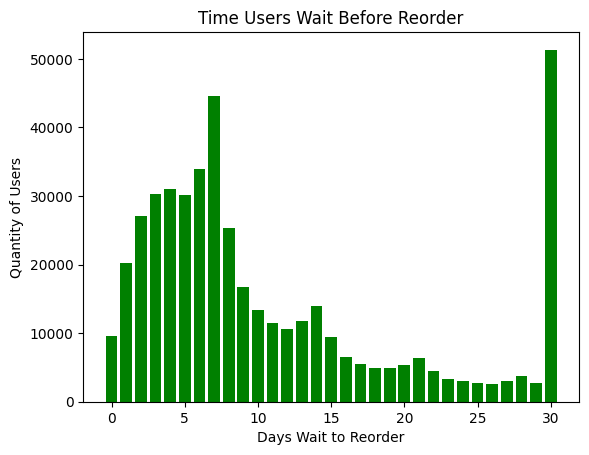

In [59]:
#Show via plot 
plt.bar(length_wait.index, length_wait.values, color='green')

# Add labels and title
plt.xlabel('Days Wait to Reorder')
plt.ylabel('Quantity of Users')
plt.title('Time Users Wait Before Reorder')


People seem to vary in their reorder time but most common is 30 days after their prior order 

### Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays?

In [60]:
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

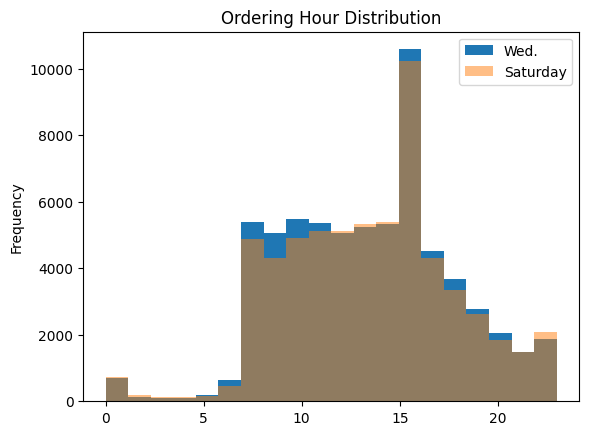

In [61]:
orders[orders['order_dow']==2]['order_hour_of_day'].plot(kind='hist',bins=20)
orders[orders['order_dow']==6]['order_hour_of_day'].plot(kind='hist',bins=20, alpha=0.5, title="Ordering Hour Distribution", xlabel="Hour of Ordering")
plt.legend(['Wed.','Saturday'])
plt.show

It seems the distrubtion between Wed. and Saturday is similiar.  However it appears more orders are made on Wed. overall. 

###  What's the distribution for the number of orders per customer?

In [62]:
orders_per_customer = orders.groupby('user_id')['order_id'].count()
#create a new grouping of each unique user id compared to unique order numbers 

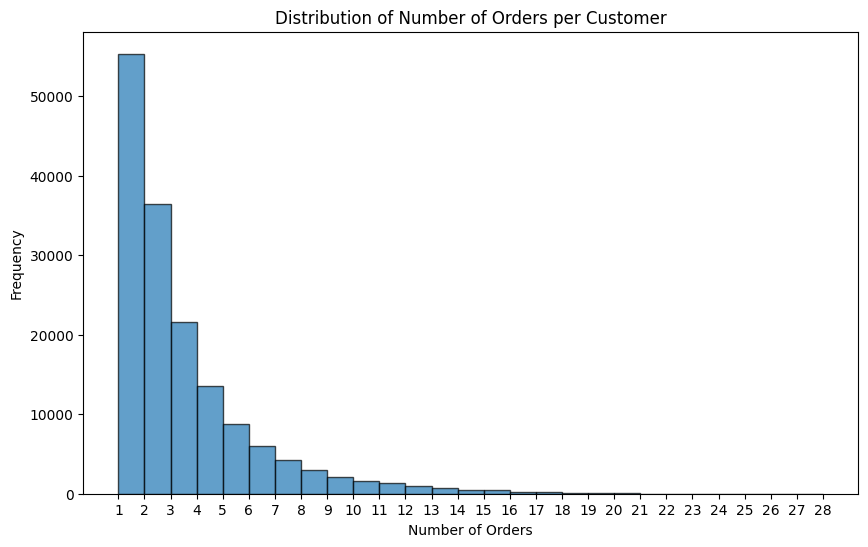

In [63]:
plt.figure(figsize=(10, 6))
plt.hist(orders_per_customer, bins=range(1, orders_per_customer.max() + 1), edgecolor='k', alpha=0.7)
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.xticks(range(1, orders_per_customer.max() + 1))
plt.show()

### What are the top 20 popular products (display their id and name)?

In [64]:
top_products = order_products['product_id'].value_counts().reset_index().head(20)
top_products.columns = ['product_id', 'count']

In [65]:
top_products_named = top_products.merge(products, on='product_id')[['product_id', 'count', 'product_name']]
display(top_products_named)

,product_id,count,product_name
0,24852,66050,banana
1,13176,53297,bag of organic bananas
2,21137,37039,organic strawberries
3,21903,33971,organic baby spinach
4,47209,29773,organic hass avocado
5,47766,24689,organic avocado
6,47626,21495,large lemon
7,16797,20018,strawberries
8,26209,19690,limes
9,27845,19600,organic whole milk


### For each product, what proportion of its orders are reorders?

In [66]:
reordered_products = order_products.groupby('product_id').agg({'reordered': ['sum', 'count', 'mean']}).reset_index()
#create a new table where the product id column is filtered through for their sum, count, and mean, if the item was reordered. 


In [67]:
reordered_products.columns = ['product_id', 'total_reorders', 'total_orders', 'reorder_proportion']
#identify column names to new table. 


In [68]:
display(reordered_products)
#display table 

,product_id,total_reorders,total_orders,reorder_proportion
0,1,158,280,0.564286
1,2,0,11,0.000000
2,3,31,42,0.738095
3,4,25,49,0.510204
4,7,1,2,0.500000
...,...,...,...,...
45568,49690,4,5,0.800000
45569,49691,31,72,0.430556
45570,49692,5,12,0.416667
45571,49693,11,25,0.440000


###  For each customer, what proportion of their products ordered are reorders?

In [69]:
#create new variable and name the columns if grouped by the unique user id and items reordered
order_id_df = pd.merge(order_products, orders, on='order_id')
#create a merged dataframe from order_products and orders around the column 'order_id'

In [70]:
reorder_proportions = order_id_df.groupby('user_id')['reordered'].mean().reset_index()
reorder_proportions.rename(columns={'reordered': 'reorder_proportion'}, inplace=True)
print(reorder_proportions)
#group the data by user_id, then calculate the mean of the reordered column for each group. The reordered column contains binary data so taking the mean gives you the proportion of reordered items for each user.

        user_id  reorder_proportion
0             2            0.038462
1             4            0.000000
2             5            0.666667
3             6            0.000000
4             7            0.928571
...         ...                 ...
149621   206203            0.222222
149622   206206            0.714286
149623   206207            0.891304
149624   206208            0.696000
149625   206209            0.320000

[149626 rows x 2 columns]


In [71]:
print(reorder_proportions['reorder_proportion'].mean())
#seems that almost half of each users order is repeated 

0.49485272499279415


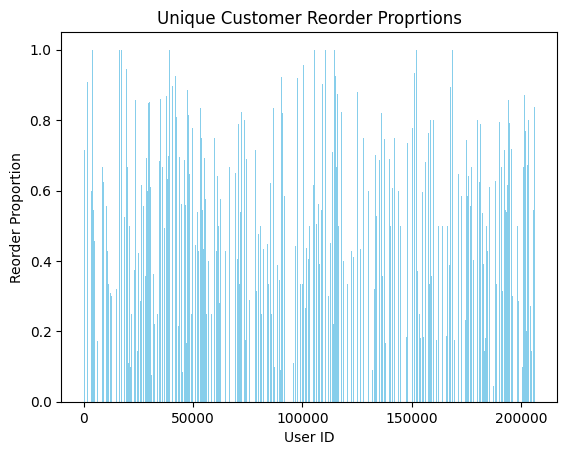

In [72]:
#plt.figure(figsize=(10,6))
plt.bar(reorder_proportions['user_id'], reorder_proportions['reorder_proportion'], color='skyblue')
plt.xlabel('User ID')
plt.ylabel('Reorder Proportion')
plt.title('Unique Customer Reorder Proprtions')
plt.show()  

Instant Data Review Conclusions
Most common order time was between 10 am and 4 pm.  Most common day to order is Sunday or Monday. Routinely people wait 30 days between reorders. Hypothesize that people who only order groceries once a month are in a higher tax bracket and routine Instacart users. Majority of customers only utilized the service for less than 4 orders. Indication that users took advantage of a special or that the service was not helpful in their lifestyle. Out of the top 20 items ordered, 15 of them are fruit. 
